# Завдання:

Виконати наступне: 

1) Завантажити дані, вивести назви колонок і розмір датасета

2) Опрацювати пропуски (по можливості заповнити їх або видалити)

3) Візуалізувати дані: побудувати графік (heatmap), що відображає кореляції
ознак між собою і з цільовою змінною (розміткою); побудувати гістограми
розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато
обмежитися декількома)

4) Нормалізувати дані

5) Провести навчання наступних класифікаторів:

kNN
дерево ухвалення рішень
SVM
Random Forest
AdaBoost

Підібрати оптимальні параметри

• для kNN

• для SVM за допомогою GridSearch підібрати оптимальні «C» і «gamma»

Серед обраних оптимальних моделей кожного класу вибрати найкращу.

Відобразити
sklearn.metrics.classification_report і sklearn.metrics.confusion_matrix

# Хід роботи

### Імпорт бібліотек

In [1]:
import opendatasets as od

import pandas as pd

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 


import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

### Завантаження даних: https://www.kaggle.com/datasets/uciml/glass

In [2]:
glass_data = pd.read_csv("glass/glass.csv")

### Дослідження і очистка даних

In [3]:
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
print("Columns: ", glass_data.columns.values, "\n\nSize: ", glass_data.shape)

Columns:  ['RI' 'Na' 'Mg' 'Al' 'Si' 'K' 'Ca' 'Ba' 'Fe' 'Type'] 

Size:  (214, 10)


In [5]:
glass_data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [6]:
corr_df = glass_data.corr()

### Візуалізація

<Axes: >

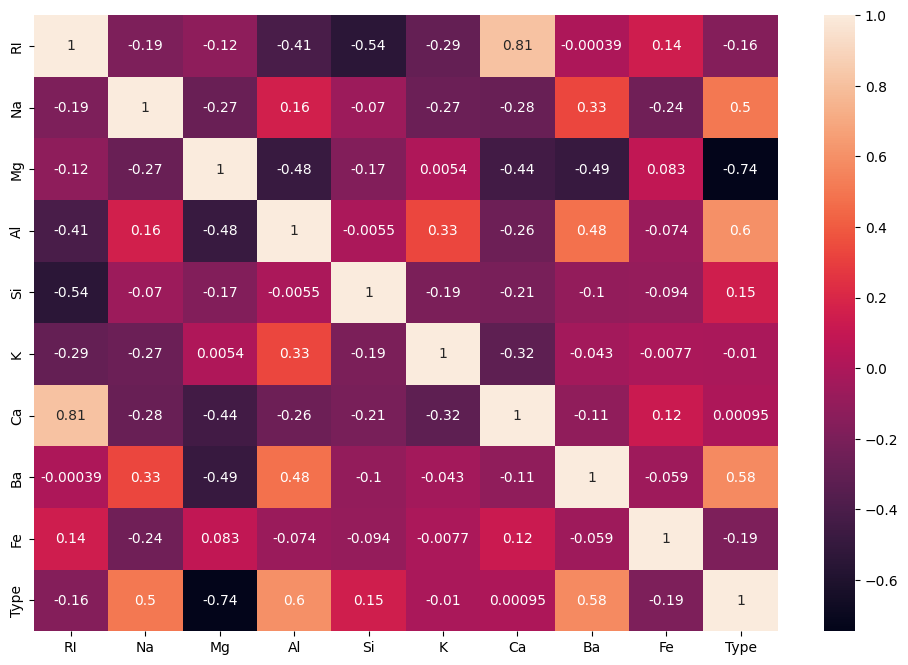

In [7]:
#Візуалізуємо кореляцію

plt.figure(figsize=(12,8))

sns.heatmap(corr_df, annot = True)

In [8]:
# виділення цільової змінної та посилок

X = glass_data.drop("Type", axis=1)
y = glass_data['Type']

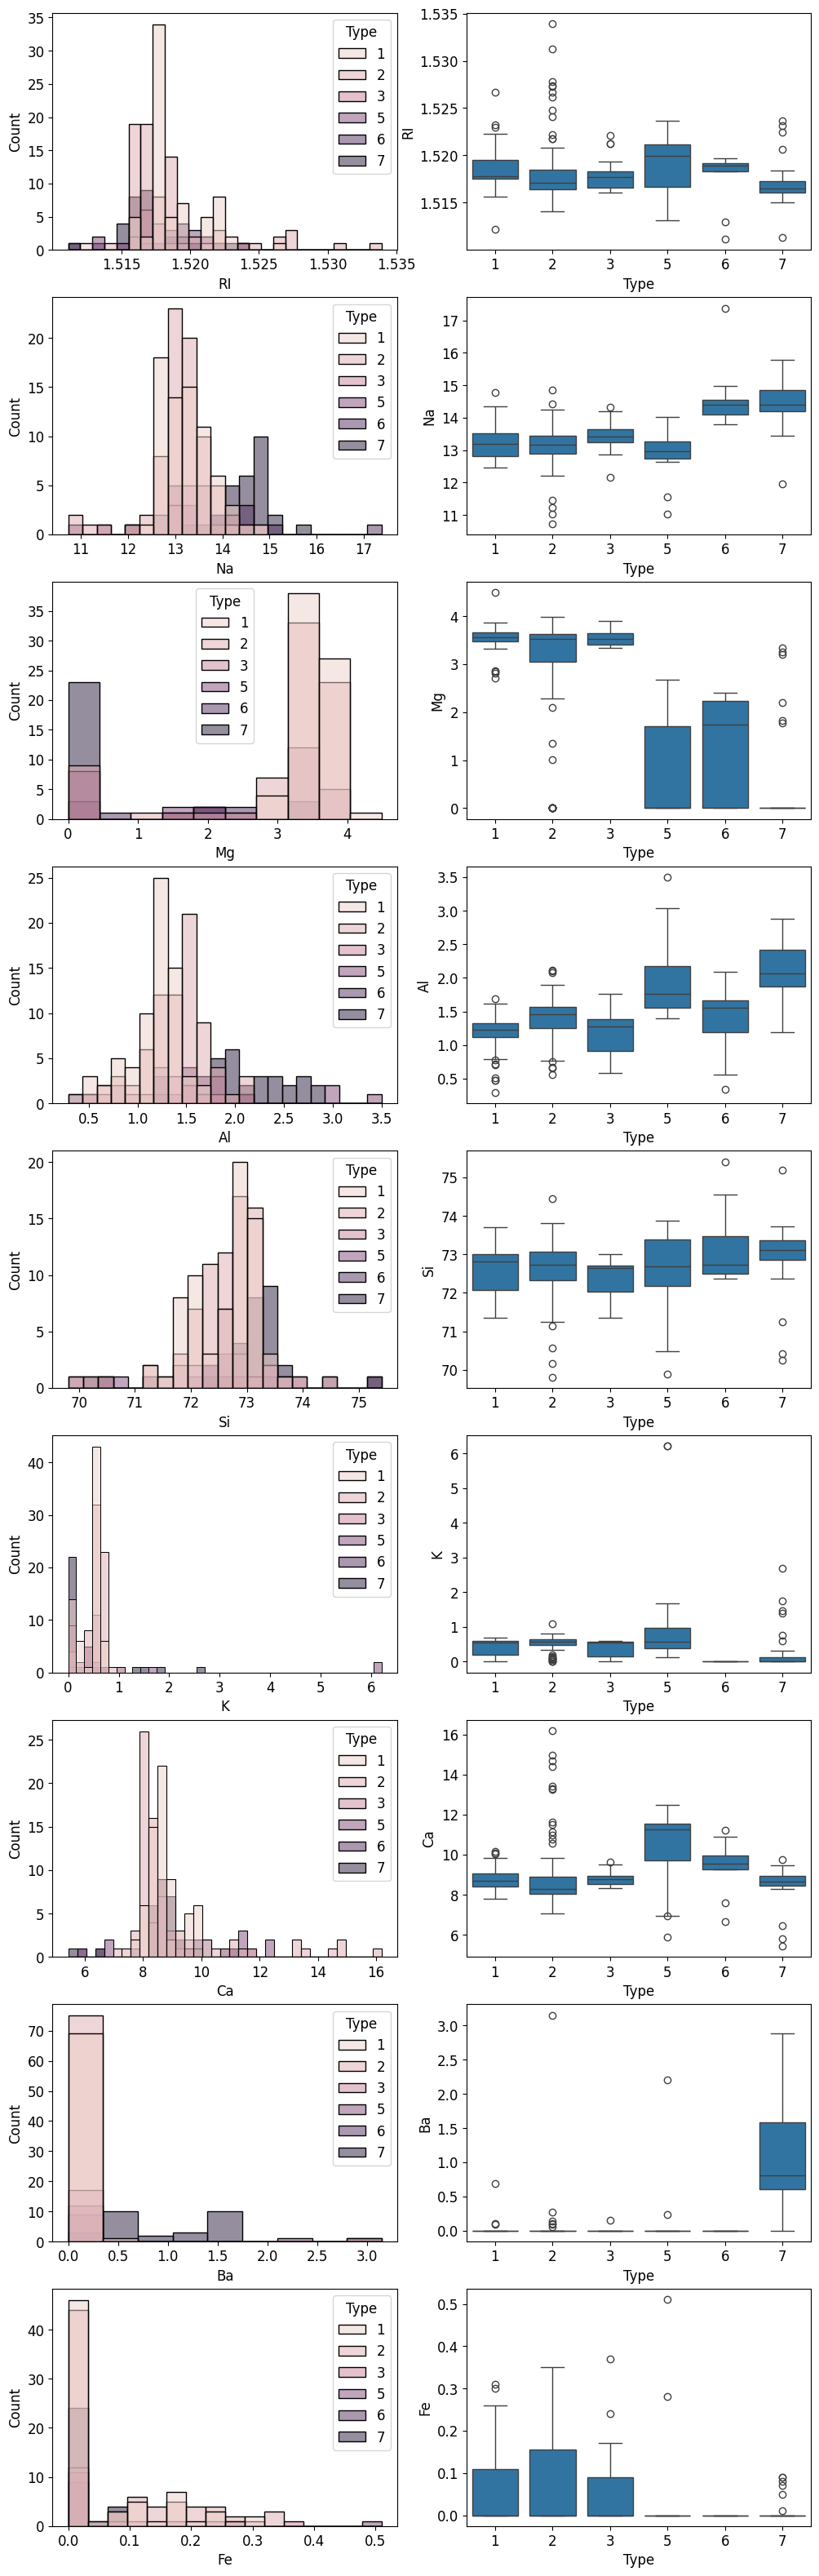

In [9]:
#гістограми розподілу ознак і boxplot-и ознак відносно цільової змінної

plt.rcParams['figure.figsize'] = [12, 40]
plt.rcParams['font.size'] = 12

fig, axs = plt.subplots(X.shape[1], 2)
for n in range(0, X.shape[1]):
    sns.histplot(data=glass_data,x = X.columns[n],hue="Type", ax = axs[n,0])
    sns.boxplot(data=glass_data, y = X.columns[n],x="Type", ax = axs[n,1])

### Нормалізація

In [10]:
scaler = preprocessing.MinMaxScaler()
X_std = scaler.fit_transform(X)
pd.DataFrame(X_std, columns=X.columns).head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0


### Класифікація

In [11]:
#ділимо дані на тест і навчання

X_train, X_test, y_train, y_test = train_test_split(X_std,y, test_size=0.3,stratify=y)

Text(0, 0.5, 'Accuracy Score')

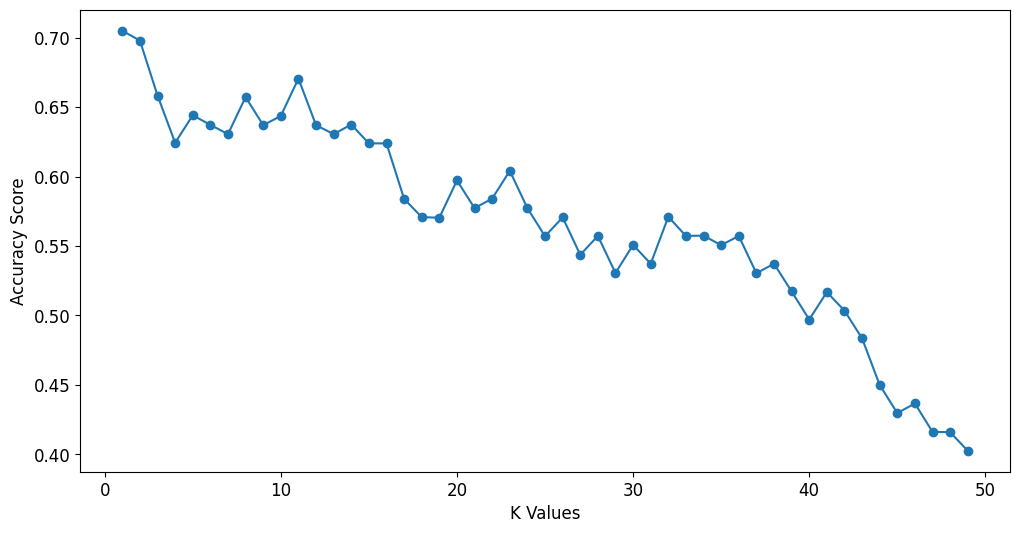

In [12]:
#Підбираємо параметри для кнн
import numpy as np

k_values = [i for i in range (1,50)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(score))
    
plt.rcParams['figure.figsize'] = [12, 6]
plt.plot(k_values, scores,'-o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [13]:
k = np.argmax(scores)+1

In [14]:
k

1

In [15]:
scores[k]

0.6979310344827587

In [16]:
# шукаємо параметри для SVC

param_grid = {'C': [0.1, 1 ,10, 100, 500, 1000], 'gamma': [1, 0.1, 0.01, 0.001]}
grid = GridSearchCV(SVC(),param_grid,refit=True)
grid.fit(X_train,y_train)
print("SVC parameters: ", grid.best_estimator_)

SVC parameters:  SVC(C=500, gamma=1)


In [17]:
#Вчимо класифікатори 

KNN = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
SVC = SVC(C=500, gamma=1).fit(X_train, y_train)
DecisionTree = DecisionTreeClassifier().fit(X_train,y_train)
RandomForest = RandomForestClassifier().fit(X_train,y_train)
AdaBoost = AdaBoostClassifier().fit(X_train,y_train)

### Оцінка класифкаторів

In [18]:
models = [KNN,SVC,DecisionTree,RandomForest,AdaBoost]

Model name:  KNeighborsClassifier(n_neighbors=1)
Classification_report: 
               precision    recall  f1-score   support

           1       0.52      0.71      0.60        21
           2       0.63      0.52      0.57        23
           3       0.00      0.00      0.00         5
           5       0.57      1.00      0.73         4
           6       1.00      0.33      0.50         3
           7       0.86      0.67      0.75         9

    accuracy                           0.58        65
   macro avg       0.60      0.54      0.52        65
weighted avg       0.59      0.58      0.57        65



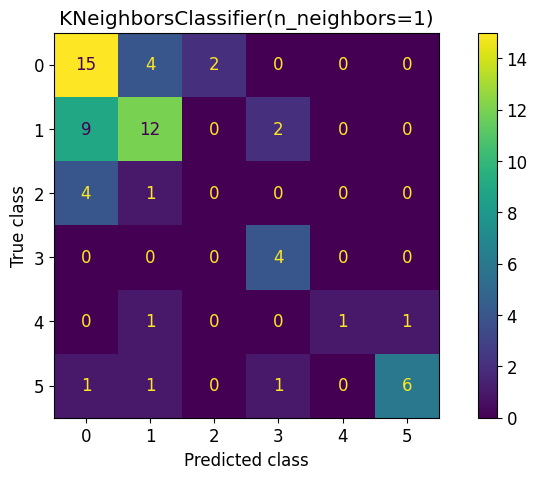

Model name:  SVC(C=500, gamma=1)
Classification_report: 
               precision    recall  f1-score   support

           1       0.48      0.52      0.50        21
           2       0.54      0.57      0.55        23
           3       0.40      0.40      0.40         5
           5       0.80      1.00      0.89         4
           6       1.00      0.33      0.50         3
           7       0.86      0.67      0.75         9

    accuracy                           0.57        65
   macro avg       0.68      0.58      0.60        65
weighted avg       0.59      0.57      0.57        65



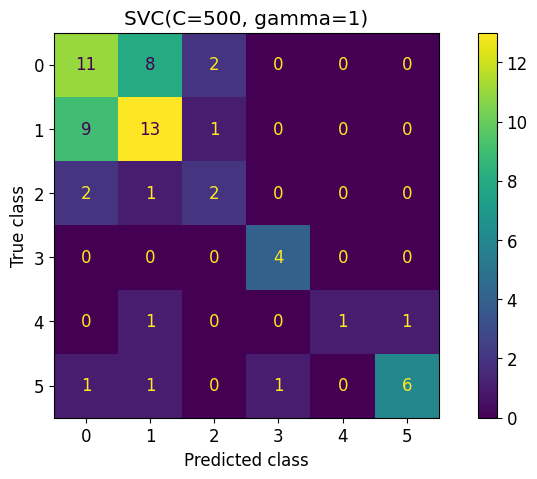

Model name:  DecisionTreeClassifier()
Classification_report: 
               precision    recall  f1-score   support

           1       0.70      0.67      0.68        21
           2       0.65      0.57      0.60        23
           3       0.33      0.60      0.43         5
           5       0.50      1.00      0.67         4
           6       0.67      0.67      0.67         3
           7       1.00      0.56      0.71         9

    accuracy                           0.63        65
   macro avg       0.64      0.68      0.63        65
weighted avg       0.68      0.63      0.64        65



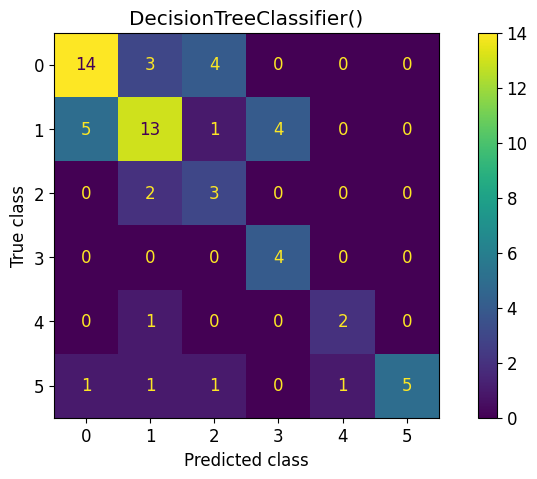

Model name:  RandomForestClassifier()
Classification_report: 
               precision    recall  f1-score   support

           1       0.65      0.71      0.68        21
           2       0.62      0.70      0.65        23
           3       0.20      0.20      0.20         5
           5       1.00      1.00      1.00         4
           6       1.00      0.33      0.50         3
           7       1.00      0.67      0.80         9

    accuracy                           0.66        65
   macro avg       0.74      0.60      0.64        65
weighted avg       0.69      0.66      0.66        65



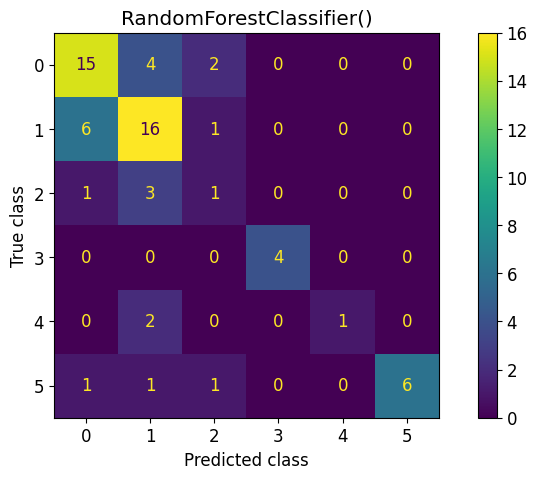

Model name:  AdaBoostClassifier()
Classification_report: 
               precision    recall  f1-score   support

           1       0.47      1.00      0.64        21
           2       0.21      0.13      0.16        23
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         4
           6       0.60      1.00      0.75         3
           7       0.00      0.00      0.00         9

    accuracy                           0.42        65
   macro avg       0.21      0.36      0.26        65
weighted avg       0.25      0.42      0.30        65



c:\Users\fvr20\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\fvr20\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\fvr20\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

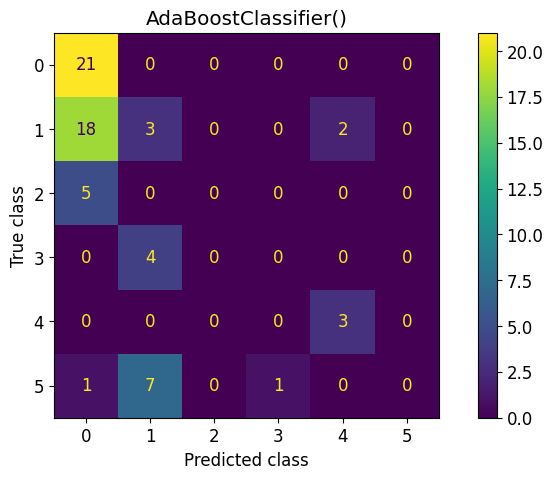

In [19]:
plt.rcParams['figure.figsize'] = [10, 5]

for model in models:

    print("Model name: ", model)
    print("Classification_report: \n", classification_report(y_test,  model.predict(X_test)))
    
    cmd_obj = ConfusionMatrixDisplay(confusion_matrix(y_test, model.predict(X_test)))
    cmd_obj.plot()
    cmd_obj.ax_.set(title= model,   xlabel='Predicted class', ylabel='True class')
    plt.show()

 ####   Найкраща модель: RandomForest (accuracy = 0.66)